In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.inspection import PartialDependenceDisplay

In [5]:
Train_df = pd.read_csv("nonurban_train_df.csv",index_col='Name')

In [6]:
Train_df=Train_df.drop('Cluster',axis=1)

In [7]:
Train_df.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,,,
Restaurant 1649,Rural,Japanese,49,3259,34243,6,109,4.2,5.5,Yes,24,11,794650.87,810.583476,High
Restaurant 1052,Suburban,Indian,55,2662,34744,4,826,1.8,4.6,Yes,27,24,421854.52,500.508350,Medium
Restaurant 2520,Suburban,Italian,60,1515,19829,13,207,8.5,3.5,Yes,44,51,659678.50,699.115449,Medium
Restaurant 1727,Rural,Italian,35,1778,24218,1,234,5.6,5.8,No,0,7,358587.50,576.446525,Medium
Restaurant 2717,Rural,Japanese,30,2966,32413,2,792,6.8,6.5,No,19,23,478350.21,1075.677952,High


In [8]:
Train_x=Train_df.drop('Revenue',axis=1)

In [9]:
Train_x.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,,
Restaurant 1649,Rural,Japanese,49,3259,34243,6,109,4.2,5.5,Yes,24,11,810.583476,High
Restaurant 1052,Suburban,Indian,55,2662,34744,4,826,1.8,4.6,Yes,27,24,500.508350,Medium
Restaurant 2520,Suburban,Italian,60,1515,19829,13,207,8.5,3.5,Yes,44,51,699.115449,Medium
Restaurant 1727,Rural,Italian,35,1778,24218,1,234,5.6,5.8,No,0,7,576.446525,Medium
Restaurant 2717,Rural,Japanese,30,2966,32413,2,792,6.8,6.5,No,19,23,1075.677952,High


In [10]:
# Apply log transformation
Train_df['Log_Revenue'] = np.log1p(Train_df['Revenue'])  # log1p handles zero values safely
Train_y=Train_df['Log_Revenue']
Train_y.head()

Name
Restaurant 1649    13.585659
Restaurant 1052    12.952418
Restaurant 2520    13.399509
Restaurant 1727    12.789931
Restaurant 2717    13.078100
Name: Log_Revenue, dtype: float64

In [11]:
Test_df = pd.read_csv("nonurban_test_df.csv",index_col='Name')

In [12]:
Test_df=Test_df.drop('Cluster',axis=1)

In [13]:
Test_df.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,,,
Restaurant 7067,Suburban,Mexican,64,2695,33408,13,200,1.3,2.8,No,15,47,433648.30,246.711479,Low
Restaurant 4801,Rural,American,33,2040,28686,13,281,9.9,9.0,Yes,10,26,311126.45,1040.465868,Medium
Restaurant 2911,Rural,American,49,2137,23569,18,376,6.0,1.5,No,20,38,508506.91,659.340288,Medium
Restaurant 2244,Suburban,Italian,51,1304,15045,11,280,1.2,3.0,No,10,13,583019.21,591.269321,Medium
Restaurant 2507,Rural,French,32,1875,18377,14,272,1.3,8.9,No,4,14,456809.29,800.546744,High


In [14]:
Test_x=Test_df.drop('Revenue',axis=1)

In [15]:
Test_x.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,,
Restaurant 7067,Suburban,Mexican,64,2695,33408,13,200,1.3,2.8,No,15,47,246.711479,Low
Restaurant 4801,Rural,American,33,2040,28686,13,281,9.9,9.0,Yes,10,26,1040.465868,Medium
Restaurant 2911,Rural,American,49,2137,23569,18,376,6.0,1.5,No,20,38,659.340288,Medium
Restaurant 2244,Suburban,Italian,51,1304,15045,11,280,1.2,3.0,No,10,13,591.269321,Medium
Restaurant 2507,Rural,French,32,1875,18377,14,272,1.3,8.9,No,4,14,800.546744,High


In [16]:
# Apply log transformation
Test_df['Log_Revenue'] = np.log1p(Test_df['Revenue'])  # log1p handles zero values safely
Test_y=Test_df['Log_Revenue']
Test_y.head()

Name
Restaurant 7067    12.979991
Restaurant 4801    12.647958
Restaurant 2911    13.139236
Restaurant 2244    13.275977
Restaurant 2507    13.032023
Name: Log_Revenue, dtype: float64

In [17]:
# === Train set ===

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
Train_x[["Meal Price Category"]] = encoder.fit_transform(Train_x[["Meal Price Category"]])
Train_x["Meal Price Category"] = Train_x["Meal Price Category"].astype(int)

# === Test set ===


encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
Test_x[["Meal Price Category"]] = encoder.fit_transform(Test_x[["Meal Price Category"]])
Test_x["Meal Price Category"] = Test_x["Meal Price Category"].astype(int)

In [18]:
# === Train set ===

encoder = OrdinalEncoder(categories=[['Rural', 'Suburban']])
Train_x[["Location"]] = encoder.fit_transform(Train_x[["Location"]])
Train_x["Location"] = Train_x["Location"].astype(int)

# === Test set ===

encoder = OrdinalEncoder(categories=[['Rural', 'Suburban']])
Test_x[["Location"]] = encoder.fit_transform(Test_x[["Location"]])
Test_x["Location"] = Test_x["Location"].astype(int)


In [19]:
categorical_cols = ['Cuisine', 'Parking Availability'] 
ordinal_categorical = [ 'Meal Price Category','Cuisine','Parking Availability','Location']
numerical_cols = [col for col in Train_x.columns if col not in ordinal_categorical]
numerical_cols = [col for col in Test_x.columns if col not in ordinal_categorical]

In [20]:
# Initialize encoder 
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform
encoded_cats = encoder.fit_transform(Train_x[categorical_cols])
encoded_cats_test = encoder.transform(Test_x[categorical_cols])  # Use transform() for test set

# Convert to DataFrame correctly
encoded_df = pd.DataFrame(
    encoded_cats,
    columns=encoder.get_feature_names_out()
)

encoded_df_test = pd.DataFrame(
    encoded_cats_test,
    columns=encoder.get_feature_names_out()
)

In [21]:
# Scale numerical features (critical for distance calculations)

scaler = StandardScaler()
Train_x[numerical_cols] = scaler.fit_transform(Train_x[numerical_cols])
Test_x[numerical_cols] = scaler.fit_transform(Test_x[numerical_cols])

In [22]:
Train_x.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,,
Restaurant 1649,0,Japanese,-0.087778,0.846527,0.568814,-0.708240,-1.509895,-0.518412,0.007502,Yes,-0.038850,-0.855066,0.331384,2
Restaurant 1052,1,Indian,0.430132,0.247265,0.616082,-1.069154,1.087152,-1.454888,-0.341146,Yes,0.150265,-0.027003,-0.669370,1
Restaurant 2520,1,Italian,0.861724,-0.904081,-0.791123,0.554962,-1.154929,1.159440,-0.767270,Yes,1.221918,1.692821,-0.028374,1
Restaurant 1727,0,Italian,-1.296234,-0.640084,-0.377029,-1.610526,-1.057132,0.027866,0.123717,No,-1.551772,-1.109855,-0.424283,1
Restaurant 2717,0,Japanese,-1.727826,0.552417,0.396156,-1.430069,0.964001,0.496103,0.394888,No,-0.354042,-0.090700,1.186965,2


In [23]:
# Combine categorical features with numerical features

Train_x1 = pd.concat([Train_x[numerical_cols].reset_index(drop=True),
    encoded_df], axis=1)

Test_x1 = pd.concat([Test_x[numerical_cols].reset_index(drop=True),
    encoded_df_test], axis=1)

In [24]:
## Add meal price category 

Train_x1['Meal Price Category'] = Train_x['Meal Price Category'].values
Test_x1['Meal Price Category'] = Test_x['Meal Price Category'].values
## Add Location category 

Train_x1['Location'] = Train_x['Location'].values
Test_x1['Location'] = Test_x['Location'].values

In [25]:
Train_x1.head()

,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Review Quality Score,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_Yes,Meal Price Category,Location
0,-0.087778,0.846527,0.568814,-0.708240,-1.509895,-0.518412,0.007502,-0.038850,-0.855066,0.331384,0.0,0.0,0.0,1.0,0.0,1.0,2,0
1,0.430132,0.247265,0.616082,-1.069154,1.087152,-1.454888,-0.341146,0.150265,-0.027003,-0.669370,0.0,1.0,0.0,0.0,0.0,1.0,1,1
2,0.861724,-0.904081,-0.791123,0.554962,-1.154929,1.159440,-0.767270,1.221918,1.692821,-0.028374,0.0,0.0,1.0,0.0,0.0,1.0,1,1
3,-1.296234,-0.640084,-0.377029,-1.610526,-1.057132,0.027866,0.123717,-1.551772,-1.109855,-0.424283,0.0,0.0,1.0,0.0,0.0,0.0,1,0
4,-1.727826,0.552417,0.396156,-1.430069,0.964001,0.496103,0.394888,-0.354042,-0.090700,1.186965,0.0,0.0,0.0,1.0,0.0,0.0,2,0


In [26]:
model = LinearRegression()
model.fit(Train_x1, Train_y)

LinearRegression()

In [27]:
# Define RMSE function
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Predict
mlr_train_predictions = model.predict(Train_x1)
mlr_test_predictions = model.predict(Test_x1)

# MSE
mlr_train_mse = mean_squared_error(Train_y, mlr_train_predictions)
mlr_test_mse = mean_squared_error(Test_y, mlr_test_predictions)

# RMSE
mlr_train_rmse = root_mean_squared_error(Train_y, mlr_train_predictions)
mlr_test_rmse = root_mean_squared_error(Test_y, mlr_test_predictions)

# MAE
mlr_train_mae = mean_absolute_error(Train_y, mlr_train_predictions)
mlr_test_mae = mean_absolute_error(Test_y, mlr_test_predictions)

# R²
mlr_train_r2 = r2_score(Train_y, mlr_train_predictions)
mlr_test_r2 = r2_score(Test_y, mlr_test_predictions)

# MSE Difference
mlr_mse_difference = mlr_train_mse - mlr_test_mse

# Print
print("MLR Train MSE:", mlr_train_mse)
print("MLR Train RMSE:", mlr_train_rmse)
print("MLR Train MAE:", mlr_train_mae)
print("MLR Train R²:", mlr_train_r2)

print("MLR Test MSE:", mlr_test_mse)
print("MLR Test RMSE:", mlr_test_rmse)
print("MLR Test MAE:", mlr_test_mae)
print("MLR Test R²:", mlr_test_r2)

print("MLR Train-Test MSE Difference:", mlr_mse_difference)

MLR Train MSE: 0.004271142959249843
MLR Train RMSE: 0.06535398196934784
MLR Train MAE: 0.053130340230267116
MLR Train R²: 0.9681636339720923
MLR Test MSE: 0.0045258904942335155
MLR Test RMSE: 0.06727473890126602
MLR Test MAE: 0.05541760129905403
MLR Test R²: 0.9647242620399263
MLR Train-Test MSE Difference: -0.0002547475349836724


In [28]:
# Define parameter grid for Elastic Net (Grid Search)
param_grid_elasticnet = {
    'alpha': np.logspace(-4, 2, 50),  
    'l1_ratio': np.linspace(0.1, 0.9, 9)   # Ratio of L1 (Lasso) to L2 (Ridge) penalty
}

# Initialize Elastic Net model
elasticnet_model_tuned = ElasticNet()

# Perform Grid Search with cross-validation (cv=5)
grid_search_elasticnet = GridSearchCV(
    elasticnet_model_tuned, 
    param_grid_elasticnet, 
    cv=10, 
    scoring='neg_mean_squared_error'
)

# Fit Grid Search on training data
grid_search_elasticnet.fit(Train_x1, Train_y)

# Extract best parameters and best score
best_params_elasticnet = grid_search_elasticnet.best_params_
best_score_elasticnet = grid_search_elasticnet.best_score_

# Print best parameters and score
print("Best parameters for Elastic Net Regression:", best_params_elasticnet)
print("Best score for Elastic Net Regression:", best_score_elasticnet)

Best parameters for Elastic Net Regression: {'alpha': 0.00013257113655901095, 'l1_ratio': 0.9}
Best score for Elastic Net Regression: -0.004309712411199852


In [29]:
# Train the Best Elastic Net Model
# Initialize best Elastic Net model with optimal parameters
elasticnet_model_best = ElasticNet(**best_params_elasticnet)

# Train the model on scaled training data
elasticnet_model_best.fit(Train_x1, Train_y)

# Predictions and Error Metrics
# Predictions on the training set
elasticnet_train_predictions = elasticnet_model_best.predict(Train_x1)

# Predictions on the test set
elasticnet_test_predictions = elasticnet_model_best.predict(Test_x1)

In [30]:
# Compute Performance Metrics

# Mean Squared Error (MSE)
elasticnet_train_mse = mean_squared_error(Train_y, elasticnet_train_predictions)
elasticnet_test_mse = mean_squared_error(Test_y, elasticnet_test_predictions)

# Root Mean Squared Error (RMSE)
elasticnet_train_rmse = root_mean_squared_error(Train_y, elasticnet_train_predictions)
elasticnet_test_rmse = root_mean_squared_error(Test_y, elasticnet_test_predictions)

# Mean Absolute Error (MAE)
elasticnet_train_mae = mean_absolute_error(Train_y, elasticnet_train_predictions)
elasticnet_test_mae = mean_absolute_error(Test_y, elasticnet_test_predictions)

# R² Score (Coefficient of Determination)
elasticnet_train_r2 = r2_score(Train_y, elasticnet_train_predictions)
elasticnet_test_r2 = r2_score(Test_y, elasticnet_test_predictions)

# MSE Difference (Overfitting Indicator)
elasticnet_mse_difference = elasticnet_train_mse - elasticnet_test_mse

In [31]:
print("Elastic Net Regression Train MSE:", elasticnet_train_mse)
print("Elastic Net Regression Test MSE:", elasticnet_test_mse)
print("Elastic Net Regression Train RMSE:", elasticnet_train_rmse)
print("Elastic Net Regression Test RMSE:", elasticnet_test_rmse)
print("Elastic Net Regression Train MAE:", elasticnet_train_mae)
print("Elastic Net Regression Test MAE:", elasticnet_test_mae)
print("Elastic Net Regression Train R²:", elasticnet_train_r2)
print("Elastic Net Regression Test R²:", elasticnet_test_r2)
print("Elastic Net Train-Test MSE Difference:", elasticnet_mse_difference)

Elastic Net Regression Train MSE: 0.004272682613506379
Elastic Net Regression Test MSE: 0.004526315052907184
Elastic Net Regression Train RMSE: 0.0653657602534108
Elastic Net Regression Test RMSE: 0.06727789423657063
Elastic Net Regression Train MAE: 0.053166495644406724
Elastic Net Regression Test MAE: 0.05542535681045052
Elastic Net Regression Train R²: 0.9681521576537074
Elastic Net Regression Test R²: 0.9647209529407468
Elastic Net Train-Test MSE Difference: -0.00025363243940080497


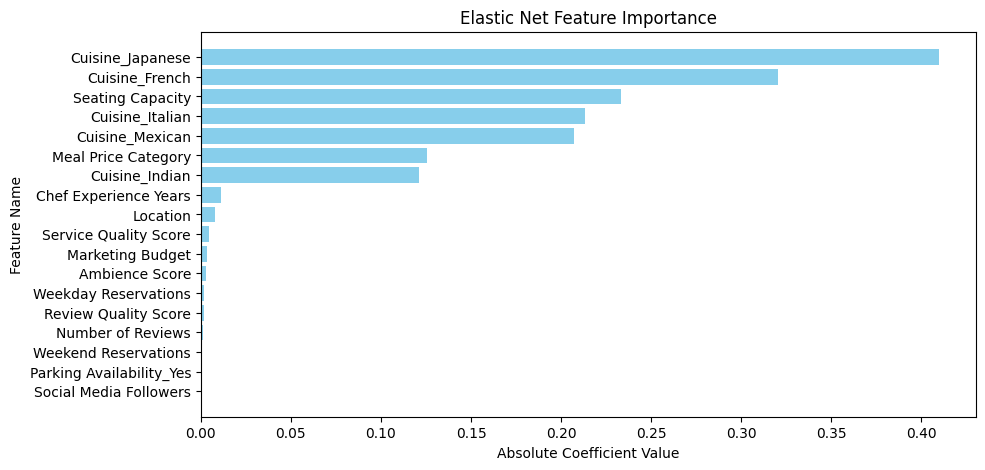

In [32]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Extract feature importance (absolute value of coefficients)
feature_importance = np.abs(elasticnet_model_best.coef_)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': Train_x1.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Elastic Net Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show top features first
plt.show()

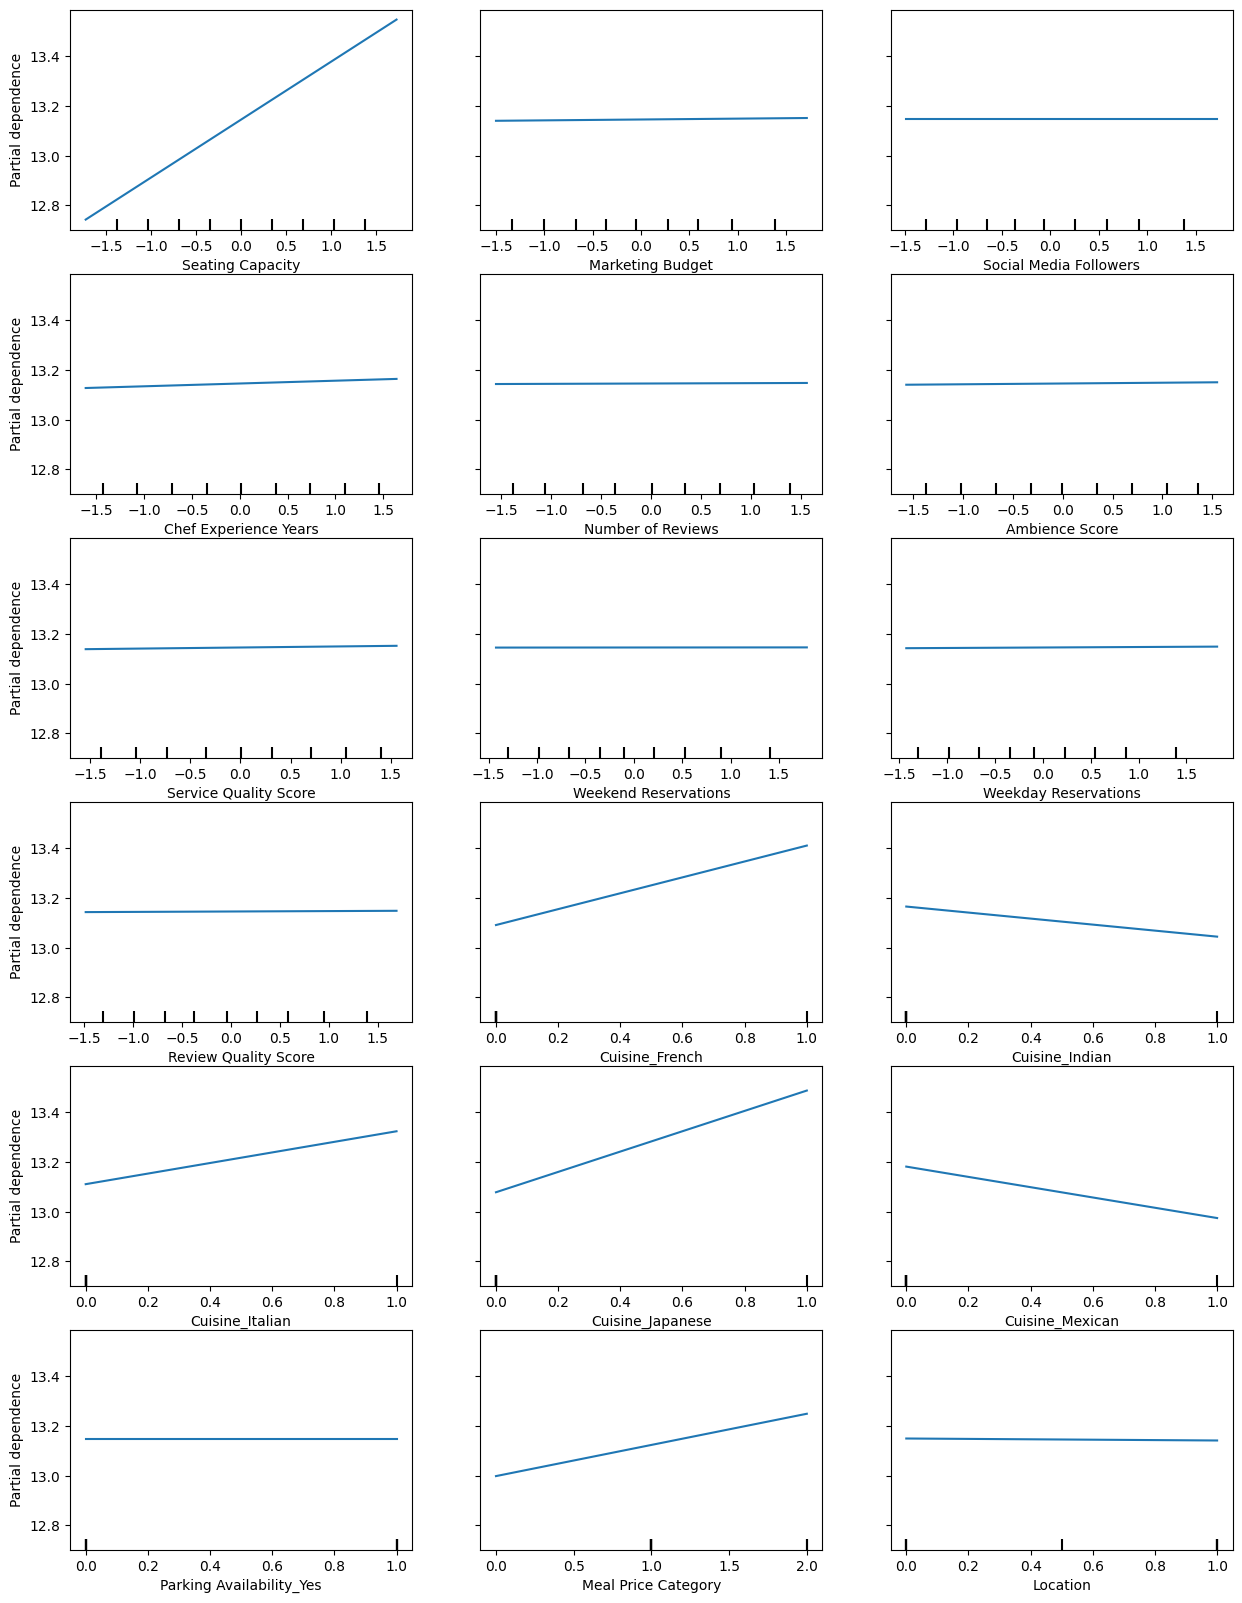

In [33]:
# Select all features for PDP
all_features_pdp = Train_x1.columns.tolist()

# Generate PDP plots for all features
fig, ax = plt.subplots(figsize=(15, 20))
display = PartialDependenceDisplay.from_estimator(
    elasticnet_model_best, Train_x1, features=all_features_pdp, ax=ax, grid_resolution=50
)
plt.show()

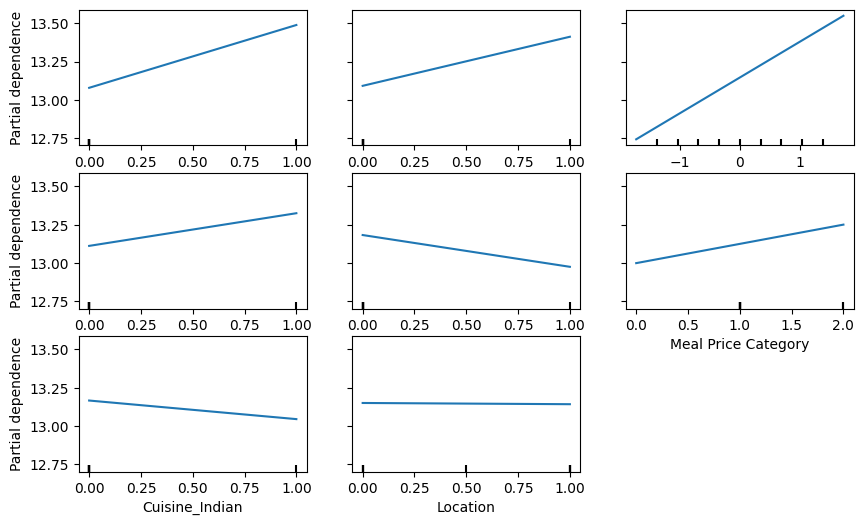

In [51]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Specify only the selected features
selected_features_pdp = ['Cuisine_Japanese','Cuisine_French', 'Seating Capacity','Cuisine_Italian','Cuisine_Mexican','Meal Price Category','Cuisine_Indian','Location']

# Generate PDP plots for selected features
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    elasticnet_model_best, Train_x1, features=selected_features_pdp, ax=ax, grid_resolution=50
)
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Perform Grid Search for best hyperparameters
rf_model_tuned = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_model_tuned, param_grid_rf, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(Train_x1, Train_y)

# Get best parameters & score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters for Random Forest:", best_params_rf)
print("Best score for Random Forest:", best_score_rf)

# Fit model with best parameters
rf_model_best = RandomForestRegressor(**best_params_rf, random_state=42)
rf_model_best.fit(Train_x1, Train_y)

# Predictions on the training set
rf_train_predictions = rf_model_best.predict(Train_x1)

# Predictions on the test set
rf_test_predictions = rf_model_best.predict(Test_x1)

# Compute Performance Metrics
rf_train_mse = mean_squared_error(Train_y, rf_train_predictions)
rf_test_mse = mean_squared_error(Test_y, rf_test_predictions)

rf_train_rmse = np.sqrt(rf_train_mse)
rf_test_rmse = np.sqrt(rf_test_mse)

rf_train_mae = mean_absolute_error(Train_y, rf_train_predictions)
rf_test_mae = mean_absolute_error(Test_y, rf_test_predictions)

rf_train_r2 = r2_score(Train_y, rf_train_predictions)
rf_test_r2 = r2_score(Test_y, rf_test_predictions)

# MSE Difference (Overfitting Indicator)
rf_mse_difference = rf_train_mse - rf_test_mse

# Print results
print("Random Forest Train MSE:", rf_train_mse)
print("Random Forest Test MSE:", rf_test_mse)
print("Random Forest Train RMSE:", rf_train_rmse)
print("Random Forest Test RMSE:", rf_test_rmse)
print("Random Forest Train MAE:", rf_train_mae)
print("Random Forest Test MAE:", rf_test_mae)
print("Random Forest Train R²:", rf_train_r2)
print("Random Forest Test R²:", rf_test_r2)
print("Random Forest Train-Test MSE Difference:", rf_mse_difference)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: -0.00395054310860089
Random Forest Train MSE: 0.001983295554692001
Random Forest Test MSE: 0.004129148760138094
Random Forest Train RMSE: 0.0445342065685693
Random Forest Test RMSE: 0.0642584528302549
Random Forest Train MAE: 0.03512166754086908
Random Forest Test MAE: 0.051751202298114966
Random Forest Train R²: 0.9852168555763382
Random Forest Test R²: 0.9678165501692142
Random Forest Train-Test MSE Difference: -0.002145853205446093


In [35]:
Train_x2=Train_df
Train_x2=Train_x2.drop(['Revenue','Log_Revenue'],axis=1)
Train_x2.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,,
Restaurant 1649,Rural,Japanese,49,3259,34243,6,109,4.2,5.5,Yes,24,11,810.583476,High
Restaurant 1052,Suburban,Indian,55,2662,34744,4,826,1.8,4.6,Yes,27,24,500.508350,Medium
Restaurant 2520,Suburban,Italian,60,1515,19829,13,207,8.5,3.5,Yes,44,51,699.115449,Medium
Restaurant 1727,Rural,Italian,35,1778,24218,1,234,5.6,5.8,No,0,7,576.446525,Medium
Restaurant 2717,Rural,Japanese,30,2966,32413,2,792,6.8,6.5,No,19,23,1075.677952,High


In [36]:
Test_x2=Test_df
Test_x2=Test_x2.drop(['Revenue','Log_Revenue'],axis=1)
Test_x2.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,,
Restaurant 7067,Suburban,Mexican,64,2695,33408,13,200,1.3,2.8,No,15,47,246.711479,Low
Restaurant 4801,Rural,American,33,2040,28686,13,281,9.9,9.0,Yes,10,26,1040.465868,Medium
Restaurant 2911,Rural,American,49,2137,23569,18,376,6.0,1.5,No,20,38,659.340288,Medium
Restaurant 2244,Suburban,Italian,51,1304,15045,11,280,1.2,3.0,No,10,13,591.269321,Medium
Restaurant 2507,Rural,French,32,1875,18377,14,272,1.3,8.9,No,4,14,800.546744,High


In [37]:
# === Train set ===

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
Train_x2[["Meal Price Category"]] = encoder.fit_transform(Train_x2[["Meal Price Category"]])
Train_x2["Meal Price Category"] = Train_x2["Meal Price Category"].astype(int)

# === Test set ===


encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
Test_x2[["Meal Price Category"]] = encoder.fit_transform(Test_x2[["Meal Price Category"]])
Test_x2["Meal Price Category"] = Test_x2["Meal Price Category"].astype(int)

In [38]:
# === Train set ===

encoder = OrdinalEncoder(categories=[['Rural', 'Suburban']])
Train_x2[["Location"]] = encoder.fit_transform(Train_x2[["Location"]])
Train_x2["Location"] = Train_x2["Location"].astype(int)

# === Test set ===

encoder = OrdinalEncoder(categories=[['Rural', 'Suburban']])
Test_x2[["Location"]] = encoder.fit_transform(Test_x2[["Location"]])
Test_x2["Location"] = Test_x2["Location"].astype(int)

In [39]:
Train_x2.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,,
Restaurant 1649,0,Japanese,49,3259,34243,6,109,4.2,5.5,Yes,24,11,810.583476,2
Restaurant 1052,1,Indian,55,2662,34744,4,826,1.8,4.6,Yes,27,24,500.508350,1
Restaurant 2520,1,Italian,60,1515,19829,13,207,8.5,3.5,Yes,44,51,699.115449,1
Restaurant 1727,0,Italian,35,1778,24218,1,234,5.6,5.8,No,0,7,576.446525,1
Restaurant 2717,0,Japanese,30,2966,32413,2,792,6.8,6.5,No,19,23,1075.677952,2


In [40]:
# One-hot encode in Train
Train_x2_encoded = pd.get_dummies(Train_x2, columns=['Cuisine', 'Parking Availability'], drop_first=False)

# One-hot encode in Test
Test_x2_encoded = pd.get_dummies(Test_x2, columns=['Cuisine', 'Parking Availability'], drop_first=False)
# Convert boolean values to integers (0 and 1)
Train_x2_encoded = Train_x2_encoded.astype(int)
Test_x2_encoded = Test_x2_encoded.astype(int)

In [41]:
Train_x2_encoded.head()

,Location,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
Name,,,,,,,,,,,,,,,,,,,,
Restaurant 1649,0,49,3259,34243,6,109,4,5,24,11,810,2,0,0,0,0,1,0,0,1
Restaurant 1052,1,55,2662,34744,4,826,1,4,27,24,500,1,0,0,1,0,0,0,0,1
Restaurant 2520,1,60,1515,19829,13,207,8,3,44,51,699,1,0,0,0,1,0,0,0,1
Restaurant 1727,0,35,1778,24218,1,234,5,5,0,7,576,1,0,0,0,1,0,0,1,0
Restaurant 2717,0,30,2966,32413,2,792,6,6,19,23,1075,2,0,0,0,0,1,0,1,0


In [42]:
import xgboost as xgb
# Initialize the XGBRegressor
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)

In [43]:
# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5],  # Fewer options
    'min_child_weight': [1, 3],  # Fewer options
    'subsample': [0.8],  # Single value
    'colsample_bytree': [0.8],  # Single value
    'gamma': [0, 0.1],  # Fewer options
    'reg_alpha': [0, 0.1],  # Fewer options
    'reg_lambda': [0, 0.1]  # Fewer options
}

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=2, verbose=1)

# Fit the grid search to the data
grid_search.fit(Train_x2_encoded, Train_y, eval_set=[(Train_x2_encoded, Train_y), (Test_x2_encoded, Test_y)], verbose=True)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[0]	validation_0-rmse:0.36317	validation_1-rmse:0.35546
[1]	validation_0-rmse:0.36004	validation_1-rmse:0.35241
[2]	validation_0-rmse:0.35677	validation_1-rmse:0.34921
[3]	validation_0-rmse:0.35383	validation_1-rmse:0.34629
[4]	validation_0-rmse:0.35074	validation_1-rmse:0.34335
[5]	validation_0-rmse:0.34846	validation_1-rmse:0.34117
[6]	validation_0-rmse:0.34544	validation_1-rmse:0.33827
[7]	validation_0-rmse:0.34236	validation_1-rmse:0.33524
[8]	validation_0-rmse:0.33933	validation_1-rmse:0.33229
[9]	validation_0-rmse:0.33670	validation_1-rmse:0.32977
[10]	validation_0-rmse:0.33366	validation_1-rmse:0.32682
[11]	validation_0-rmse:0.33066	validation_1-rmse:0.32391
[12]	validation_0-rmse:0.32770	validation_1-rmse:0.32102
[13]	validation_0-rmse:0.32476	validation_1-rmse:0.31816
[14]	validation_0-rmse:0.32186	validation_1-rmse:0.31533
[15]	validation_0-rmse:0.31903	validation_1-rmse:0.31258
[16]	validation_0-rmse:0.31630	valid

In [44]:
# Train the model with the best parameters
best_reg = xgb.XGBRegressor(**grid_search.best_params_, objective='reg:squarederror', n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
best_reg.fit(Train_x2_encoded, Train_y, eval_set=[(Train_x2_encoded, Train_y), (Test_x2_encoded, Test_y)], verbose=True)

[0]	validation_0-rmse:0.36317	validation_1-rmse:0.35546
[1]	validation_0-rmse:0.36004	validation_1-rmse:0.35241
[2]	validation_0-rmse:0.35677	validation_1-rmse:0.34921
[3]	validation_0-rmse:0.35383	validation_1-rmse:0.34629
[4]	validation_0-rmse:0.35074	validation_1-rmse:0.34335
[5]	validation_0-rmse:0.34846	validation_1-rmse:0.34117
[6]	validation_0-rmse:0.34544	validation_1-rmse:0.33827
[7]	validation_0-rmse:0.34236	validation_1-rmse:0.33524
[8]	validation_0-rmse:0.33933	validation_1-rmse:0.33229
[9]	validation_0-rmse:0.33670	validation_1-rmse:0.32977
[10]	validation_0-rmse:0.33366	validation_1-rmse:0.32682
[11]	validation_0-rmse:0.33066	validation_1-rmse:0.32391
[12]	validation_0-rmse:0.32770	validation_1-rmse:0.32102
[13]	validation_0-rmse:0.32476	validation_1-rmse:0.31816
[14]	validation_0-rmse:0.32186	validation_1-rmse:0.31533
[15]	validation_0-rmse:0.31903	validation_1-rmse:0.31258
[16]	validation_0-rmse:0.31630	validation_1-rmse:0.30991
[17]	validation_0-rmse:0.31350	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
# Evaluate the model
y_pred = best_reg.predict(Train_x2_encoded)
mse = mean_squared_error(Train_y, y_pred)
mae = mean_absolute_error(Train_y, y_pred)
r2 = r2_score(Train_y, y_pred)

print(f"Mean Squared Train Error: {mse}")
print(f"Mean Absolute Train Error: {mae}")
print(f"Train R^2 Score: {r2}")

Mean Squared Train Error: 0.0027166668555183137
Mean Absolute Train Error: 0.04214990686462517
Train R^2 Score: 0.9797504318601978


In [46]:
# Evaluate the model
y_pred = best_reg.predict(Test_x2_encoded)
mse = mean_squared_error(Test_y, y_pred)
mae = mean_absolute_error(Test_y, y_pred)
r2 = r2_score(Test_y, y_pred)

print(f"Mean Squared Test Error: {mse}")
print(f"Mean Absolute Test Error: {mae}")
print(f"Test R^2 Score: {r2}")

Mean Squared Test Error: 0.004009150469123178
Mean Absolute Test Error: 0.05135107781720012
Test R^2 Score: 0.9687518419697764
